In [3]:
# Задание 1
import numpy as np
import matplotlib.pyplot as plt

!wget -O "messi.jpg" "https://ss.sport-express.ru/userfiles/materials/184/1848887/volga.jpg"

--2024-02-26 16:05:16--  https://ss.sport-express.ru/userfiles/materials/184/1848887/volga.jpg
Resolving ss.sport-express.ru (ss.sport-express.ru)... 46.229.162.174
Connecting to ss.sport-express.ru (ss.sport-express.ru)|46.229.162.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54753 (53K) [image/jpeg]
Saving to: ‘messi.jpg’

messi.jpg           100%[===================>]  53.47K  --.-KB/s    in 0.1s    

2024-02-26 16:05:17 (453 KB/s) - ‘messi.jpg’ saved [54753/54753]



(350, 624, 3)


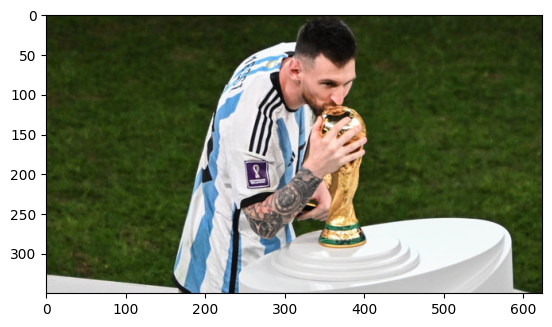

In [4]:
img = plt.imread("messi.jpg")
plt.imshow(img)
print(img.shape)

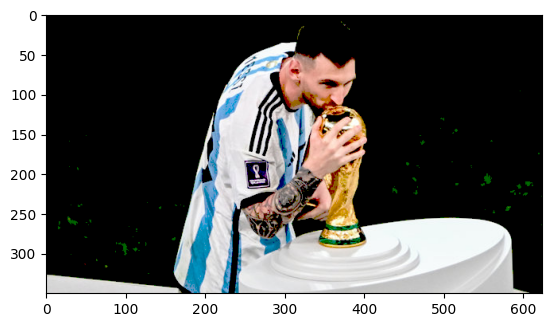

In [43]:
data = img.copy()
data[data < 90] = 0
plt.imshow(data)

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [17]:
! kaggle datasets download lsind18/gemstones-images

 87% 48.0M/55.2M [00:00<00:00, 156MB/s]
100% 55.2M/55.2M [00:00<00:00, 120MB/s]


In [ ]:
! unzip gemstones-images.zip

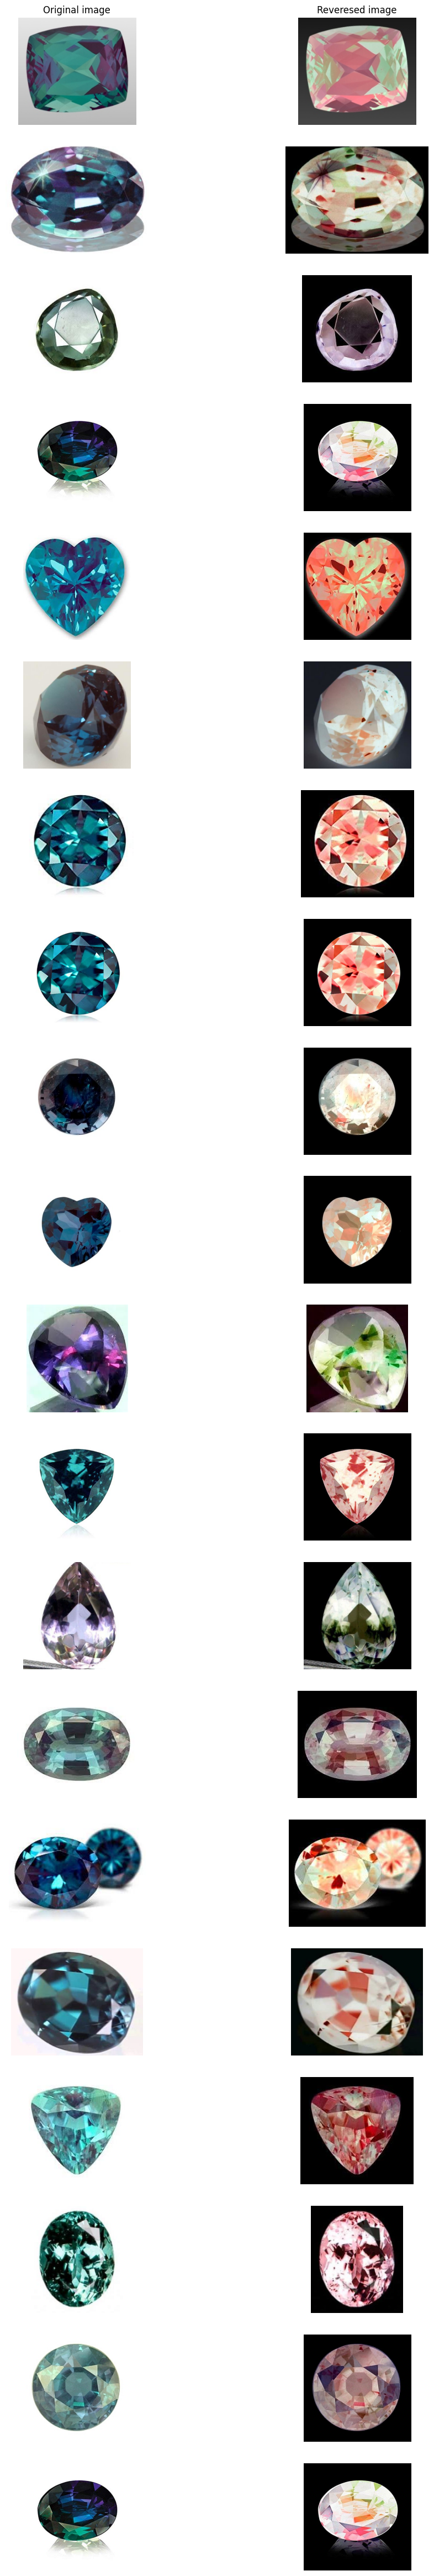

In [45]:
def reversed_num(num: int) -> int:
  num = 255 - num
  return num

num_images = 20
fig, ax = plt.subplots(num_images, 2, figsize=(12, num_images * 3))
ax[0,0].set_title("Original image")
ax[0,1].set_title("Reveresed image")

for i in range(num_images):
  image = plt.imread(f'/content/train/Alexandrite/alexandrite_{i+1}.jpg')
  reversed_image = reversed_num(image)
  ax[i,0].imshow(image)
  ax[i,0].axis(False)

  ax[i,1].imshow(reversed_image)
  ax[i,1].axis(False)


In [6]:
# Задание 2
import pandas as pd

!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [7]:
df = pd.read_csv("train.csv")
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
# Половозрастная структура
a = df['Age'][df.Sex == 'male'].agg(['mean', 'min', 'max'])
b = df['Age'][df.Sex == 'female'].agg(['mean', 'min', 'max'])

print(f'Средний возраст мужчины: {a[0]}')
print(f'Средний возраст женщины: {b[0]}')

print(f'Минимальный возраст мужчины: {a[1]}')
print(f'Максимальный возраст женщины: {b[1]}')

print(f'Минимальный возраст мужчины: {a[2]}')
print(f'Минимальный возраст женщины: {b[2]}')

Средний возраст мужчины: 30.72664459161148
Средний возраст женщины: 27.915708812260537
Минимальный возраст мужчины: 0.42
Максимальный возраст женщины: 0.75
Минимальный возраст мужчины: 80.0
Минимальный возраст женщины: 63.0


In [14]:
# Количество пустых значений
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Смотрел значения этого столбца
print(df['Parch'].nunique())
df['Parch'].unique()

7


array([0, 1, 2, 5, 3, 4, 6])

In [105]:
# Средняя стоимость билета
mean_fare = df['Fare'].mean()
print(f'Средняя цена билета: {mean_fare}')

Средняя цена билета: 32.204207968574636


In [16]:
# Сопоставить колонки Fare и Embarked
df[['Fare', 'Embarked']].groupby('Embarked').agg({'Fare' : ['mean', 'max', 'mean']})

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:40: PerformanceWarning: indexing past lexsort depth may impact performance.
  dtype = df[column].dtype


Fare                     
               mean       max       mean
Embarked                                
C         59.954144  512.3292  59.954144
Q         13.276030   90.0000  13.276030
S         27.079812  263.0000  27.079812

In [23]:
# Зависимость выживаемости от порта
df[['Survived', 'Embarked']].groupby('Embarked').agg('sum')

,Survived
Embarked,
C,93
Q,30
S,217


In [175]:
# Количество выживших младенцев (до 1 года)
alive = df['Name'][df.Age < 1][df.Survived == 1].count()
dead = df['Name'][df.Age < 1][df.Survived == 0].count()

print(f'{alive} младенцев были спасены, погибших {dead}')

7 младенцев были спасены, погибших 0
